# Domain Background

Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death. Because it is carried by mosquitoes, the transmission dynamics of dengue are [related to climate variables](http://ehp.niehs.nih.gov/wp-content/uploads/121/11-12/ehp.1306556.pdf) such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant [public health implications worldwide](http://rstb.royalsocietypublishing.org/content/370/1665/20140135.full).

An understanding of the relationship between climate and dengue dynamics can improve research initiatives and resource allocation to help fight life-threatening pandemics.


# Problem Statement

Given the data of two cities, San Juan and Iquitos, each city spanning 5 and 3 years respectively, the objective is to learn from the data and predict the number of dengue cases each week, in each location, based on environmental variables describing changes in temperature, precipitation, vegetation, and more


# Datasets and Inputs

The Training data (features + labels) is provided by the drivendata [competition](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/) and each entry in the features file has the following data:

City and date indicators:
* <code>city</code> – City abbreviations: sj for San Juan and iq for Iquitos
* <code>week_start_date</code> – Date given in yyyy-mm-dd format

NOAA's GHCN daily climate data weather station measurements:
* <code>station_max_temp_c</code> – Maximum temperature
* <code>station_min_temp_c</code> – Minimum temperature
* <code>station_avg_temp_c</code> – Average temperature
* <code>station_precip_mm</code> – Total precipitation
* <code>station_diur_temp_rng_c</code> – Diurnal temperature range

PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)
* <code>precipitation_amt_mm</code> – Total precipitation

NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)
* <code>reanalysis_sat_precip_amt_mm</code> – Total precipitation
* <code>reanalysis_dew_point_temp_k</code> – Mean dew point temperature
* <code>reanalysis_air_temp_k</code> – Mean air temperature
* <code>reanalysis_relative_humidity_percent</code> – Mean relative humidity
* <code>reanalysis_specific_humidity_g_per_kg</code> – Mean specific humidity
* <code>reanalysis_precip_amt_kg_per_m2</code> – Total precipitation
* <code>reanalysis_max_air_temp_k</code> – Maximum air temperature
* <code>reanalysis_min_air_temp_k</code> – Minimum air temperature
* <code>reanalysis_avg_temp_k</code> – Average air temperature
* <code>reanalysis_tdtr_k</code> – Diurnal temperature range

Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements:
* <code>ndvi_se</code> – Pixel southeast of city centroid
* <code>ndvi_sw</code> – Pixel southwest of city centroid
* <code>ndvi_ne</code> – Pixel northeast of city centroid
* <code>ndvi_nw</code> – Pixel northwest of city centroid


# Benchmark Model
The competition already provided a [benchmark model](http://drivendata.co/blog/dengue-benchmark/). The benchmark model hypothesizes that the spread of dengue may follow different patterns between the two cities, therefore the dataset was divided and trained two separate models for each city.

As for the regression model it was chosen the Negative Binomial Distribution, one reason to choose this was because the variance of the labels values is greater than the mean of the labels, and as for the data it was pre-processed in order to fill the NaN values with the previous values and selected the four features that shown more correlation with the labels.

Finally as for training as a timeseries model , it was used a strict-future holdout set when splitting the training set and the test set, by keeping around three quarters of the original data for training and the rest to test. After trained, the model was use to predict the total cases for a test set provided by the competition and the results submitted. The submission score was 25.8173.

# Exploring the Data

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np

#Load competition data
dengue_features_train = pd.read_csv("dengue_features_train.csv")
dengue_labels_train = pd.read_csv("dengue_labels_train.csv")

dengue_features_test = pd.read_csv("dengue_features_test.csv")

# Display first records
display(dengue_features_train.head())

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k        ...          \
0  0.177617                 12.42             297.572857        ...           
1  0.155486                 22.82             298.211429        ...           
2  0.170843                 34.54             298.781429        ...           
3  0.235886                 15.36             298.987143        ...           
4  0.247340                  7.52             299.518571        ...           

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [22]:
dengue_features_train.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

** Comments:** Not considering the city and dates related features, the rest have the same type, float64, there are no categorical variables, therefore there's no need to use One-Hot Encoding.

In [23]:
# Split the datasets into two dataframes, one per city
dengue_features_train_sj = dengue_features_train[dengue_features_train['city'] == 'sj']
dengue_features_train_sj = dengue_features_train_sj.drop(['city'], axis=1)

dengue_features_train_iq = dengue_features_train[dengue_features_train['city'] == 'iq']
dengue_features_train_iq = dengue_features_train_iq.drop(['city'], axis=1)

### Explore  San Juan data

In [26]:
#drop columns that will be used for the time series model
dengue_features_train_sj_raw = dengue_features_train_sj[dengue_features_train_sj.columns.difference(['city', 'year', 'weekofyear', 'week_start_date'])]

#A look at the data
dengue_features_train_sj_raw.describe().T

count        mean        std  \
ndvi_ne                                745.0    0.057925   0.107153   
ndvi_nw                                887.0    0.067469   0.092479   
ndvi_se                                917.0    0.177655   0.057166   
ndvi_sw                                917.0    0.165956   0.056073   
precipitation_amt_mm                   927.0   35.470809  44.606137   
reanalysis_air_temp_k                  930.0  299.163653   1.236429   
reanalysis_avg_temp_k                  930.0  299.276920   1.218637   
reanalysis_dew_point_temp_k            930.0  295.109519   1.569943   
reanalysis_max_air_temp_k              930.0  301.398817   1.258927   
reanalysis_min_air_temp_k              930.0  297.301828   1.294705   
reanalysis_precip_amt_kg_per_m2        930.0   30.465419  35.628055   
reanalysis_relative_humidity_percent   930.0   78.568181   3.389488   
reanalysis_sat_precip_amt_mm           927.0   35.470809  44.606137   
reanalysis_specific_humidity_g_per_kg  930.0   16.552409   1.560923   
reanalysis_tdtr_k                      930.0    2.516267   0.498892   
station_avg_temp_c                     930.0   27.006528   1.415473   
station_diur_temp_rng_c                930.0    6.757373   0.835993   
station_max_temp_c                     930.0   31.607957   1.717297   
station_min_temp_c                     930.0   22.600645   1.506277   
station_precip_mm                      930.0   26.785484  29.325811   

                                              min         25%         50%  \
ndvi_ne                                 -0.406250    0.004500    0.057700   
ndvi_nw                                 -0.456100    0.016425    0.068075   
ndvi_se                                 -0.015533    0.139283    0.177186   
ndvi_sw                                 -0.063457    0.129157    0.165971   
precipitation_amt_mm                     0.000000    0.000000   20.800000   
reanalysis_air_temp_k                  295.938571  298.195000  299.254286   
reanalysis_avg_temp_k                  296.114286  298.300000  299.378571   
reanalysis_dew_point_temp_k            289.642857  293.847857  295.464286   
reanalysis_max_air_temp_k              297.800000  300.400000  301.500000   
reanalysis_min_air_temp_k              292.600000  296.300000  297.500000   
reanalysis_precip_amt_kg_per_m2          0.000000   10.825000   21.300000   
reanalysis_relative_humidity_percent    66.735714   76.246071   78.667857   
reanalysis_sat_precip_amt_mm             0.000000    0.000000   20.800000   
reanalysis_specific_humidity_g_per_kg   11.715714   15.236429   16.845714   
reanalysis_tdtr_k                        1.357143    2.157143    2.457143   
station_avg_temp_c                      22.842857   25.842857   27.228571   
station_diur_temp_rng_c                  4.528571    6.200000    6.757143   
station_max_temp_c                      26.700000   30.600000   31.700000   
station_min_temp_c                      17.800000   21.700000   22.800000   
station_precip_mm                        0.000000    6.825000   17.750000   

                                              75%         max  
ndvi_ne                                  0.111100    0.493400  
ndvi_nw                                  0.115200    0.437100  
ndvi_se                                  0.212557    0.393129  
ndvi_sw                                  0.202771    0.381420  
precipitation_amt_mm                    52.180000  390.600000  
reanalysis_air_temp_k                  300.132857  302.200000  
reanalysis_avg_temp_k                  300.228571  302.164286  
reanalysis_dew_point_temp_k            296.418929  297.795714  
reanalysis_max_air_temp_k              302.400000  304.300000  
reanalysis_min_air_temp_k              298.400000  299.900000  
reanalysis_precip_amt_kg_per_m2         37.000000  570.500000  
reanalysis_relative_humidity_percent    80.963214   87.575714  
reanalysis_sat_precip_amt_mm            52.180000  390.600000  
reanalysis_specific_humidity_g_pe

**Analysis:** The table above shows that the features values have very different magnitudes, this will be addressed by scaling features. 

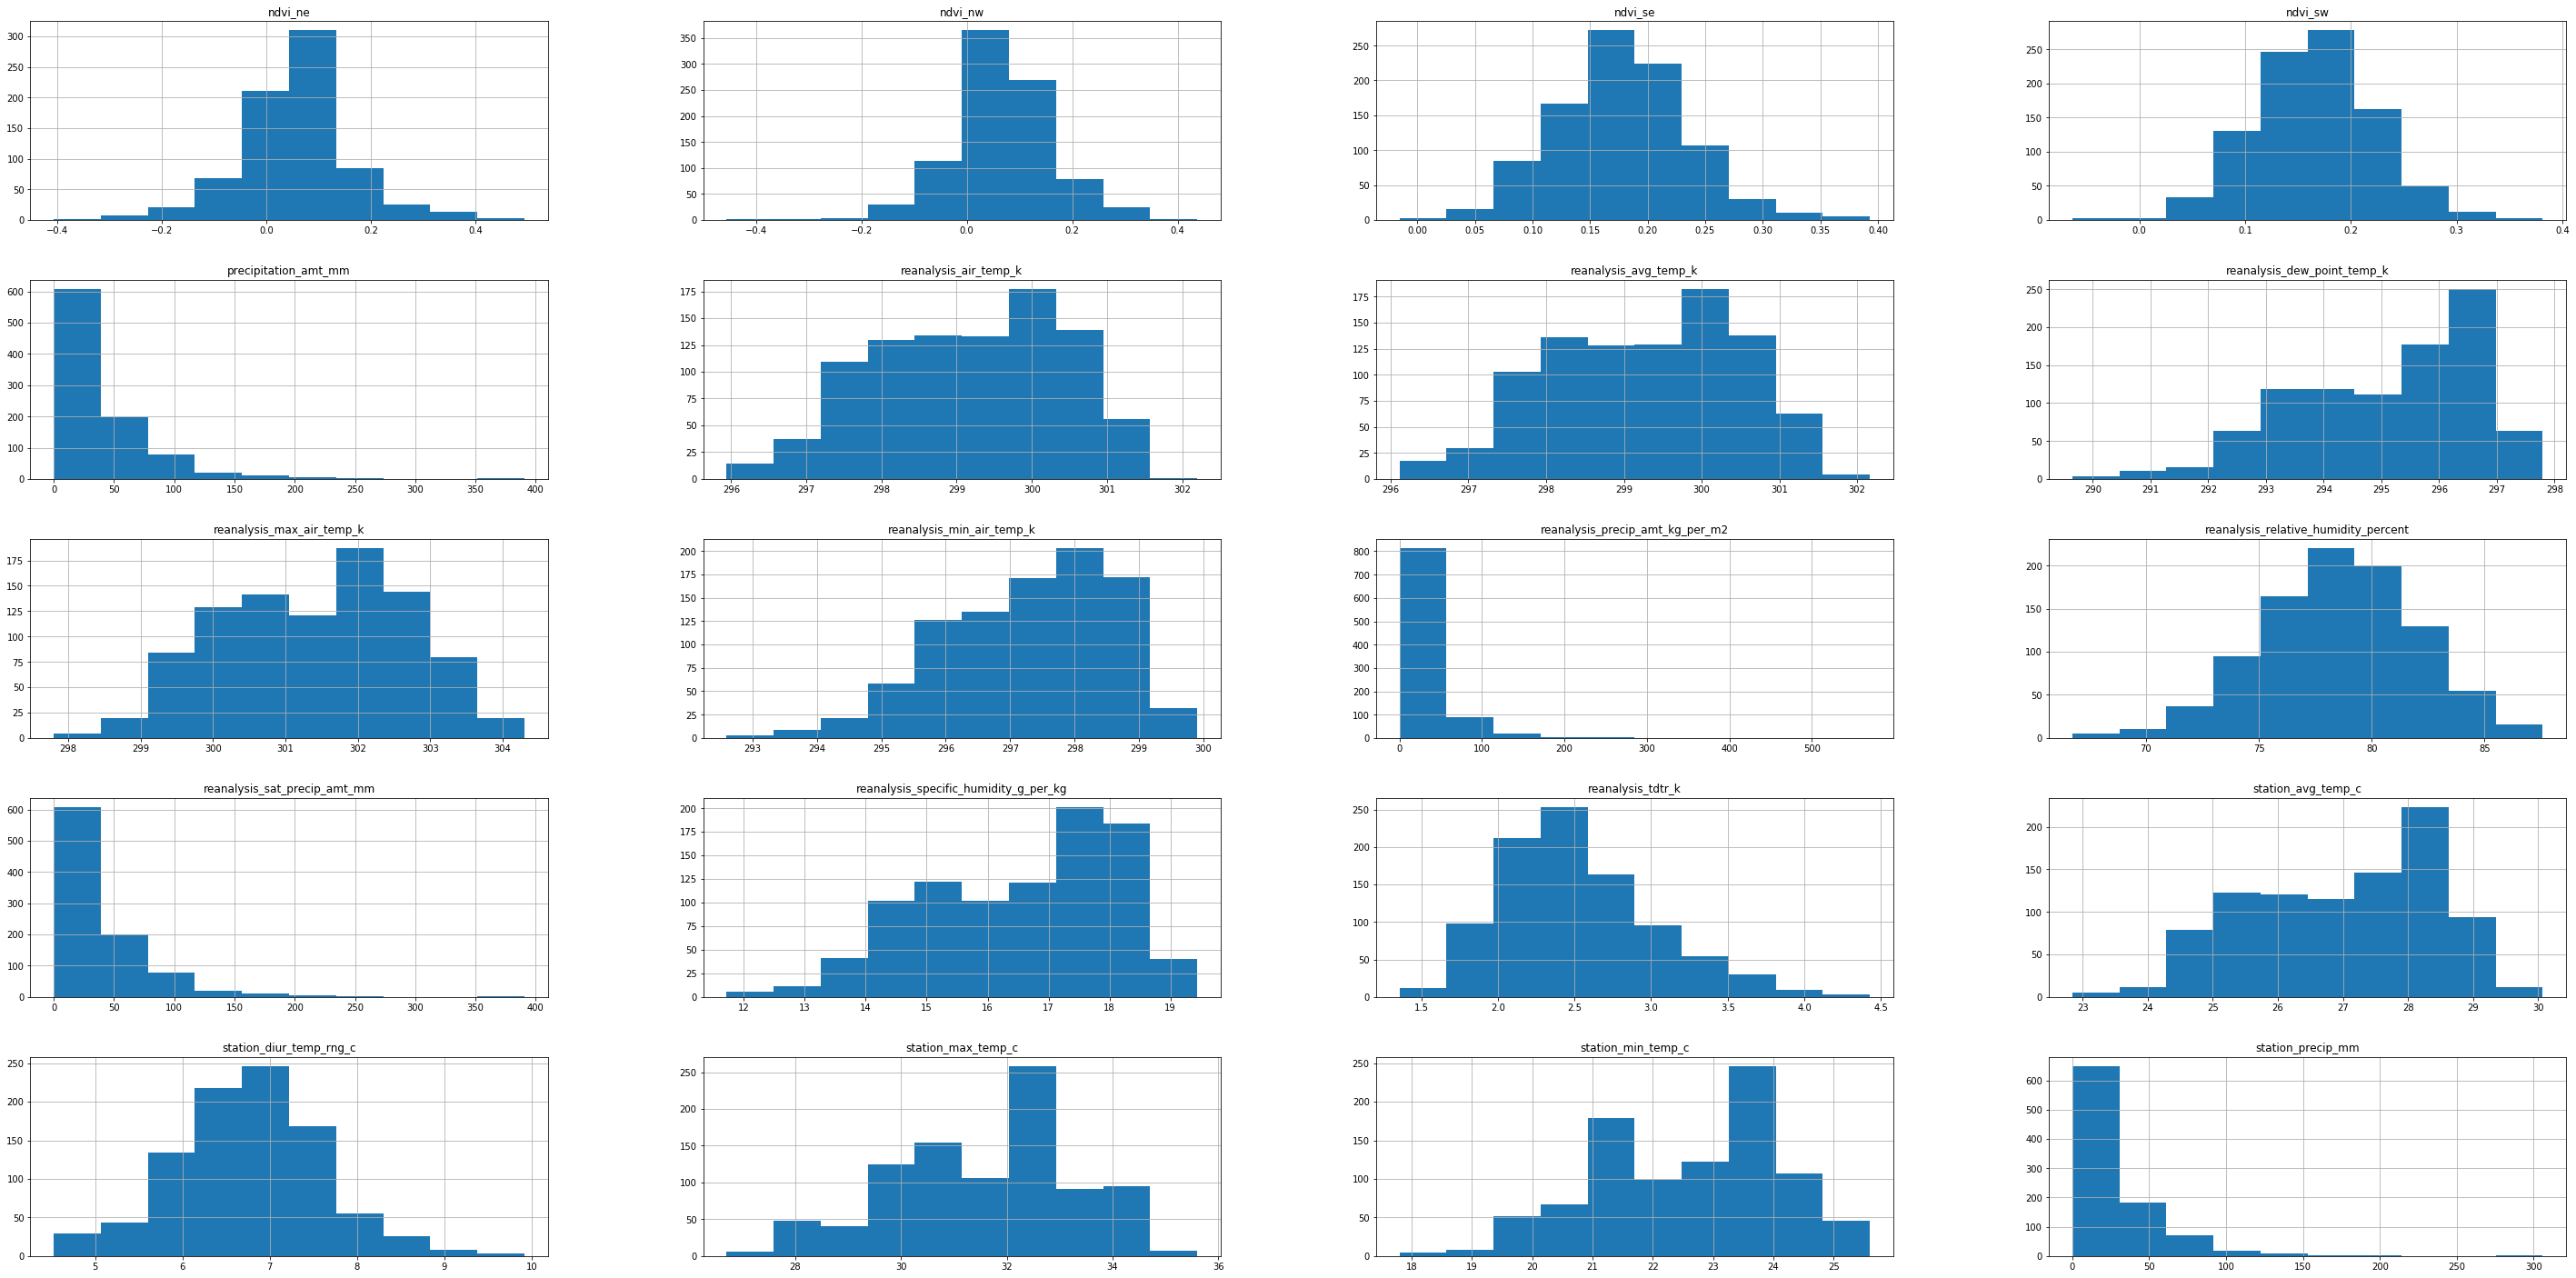

In [29]:
# Check for distribution
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [50, 25]
#sns.set(font_scale = 2)
#plt.figure(figsize=(20, 10))
dengue_features_train_sj_raw.hist()
plt.show()

** Comments: ** 

Some of the graphs are highly right skewed, namely the ones corresponding to the features:
- precipitation_amt_mm
- reanalysis_precip_amt_kg_per_m2
- reanalysis_sat_precip_amt_mm
- station_precip_mm


### Analyse feature relevance

Through the use of Scatter Matrices and correlation heatmaps I am going to check the correlation between features and check the correlation between features and labels. The objective is to discard irrelevant (or even not less relevant) features.


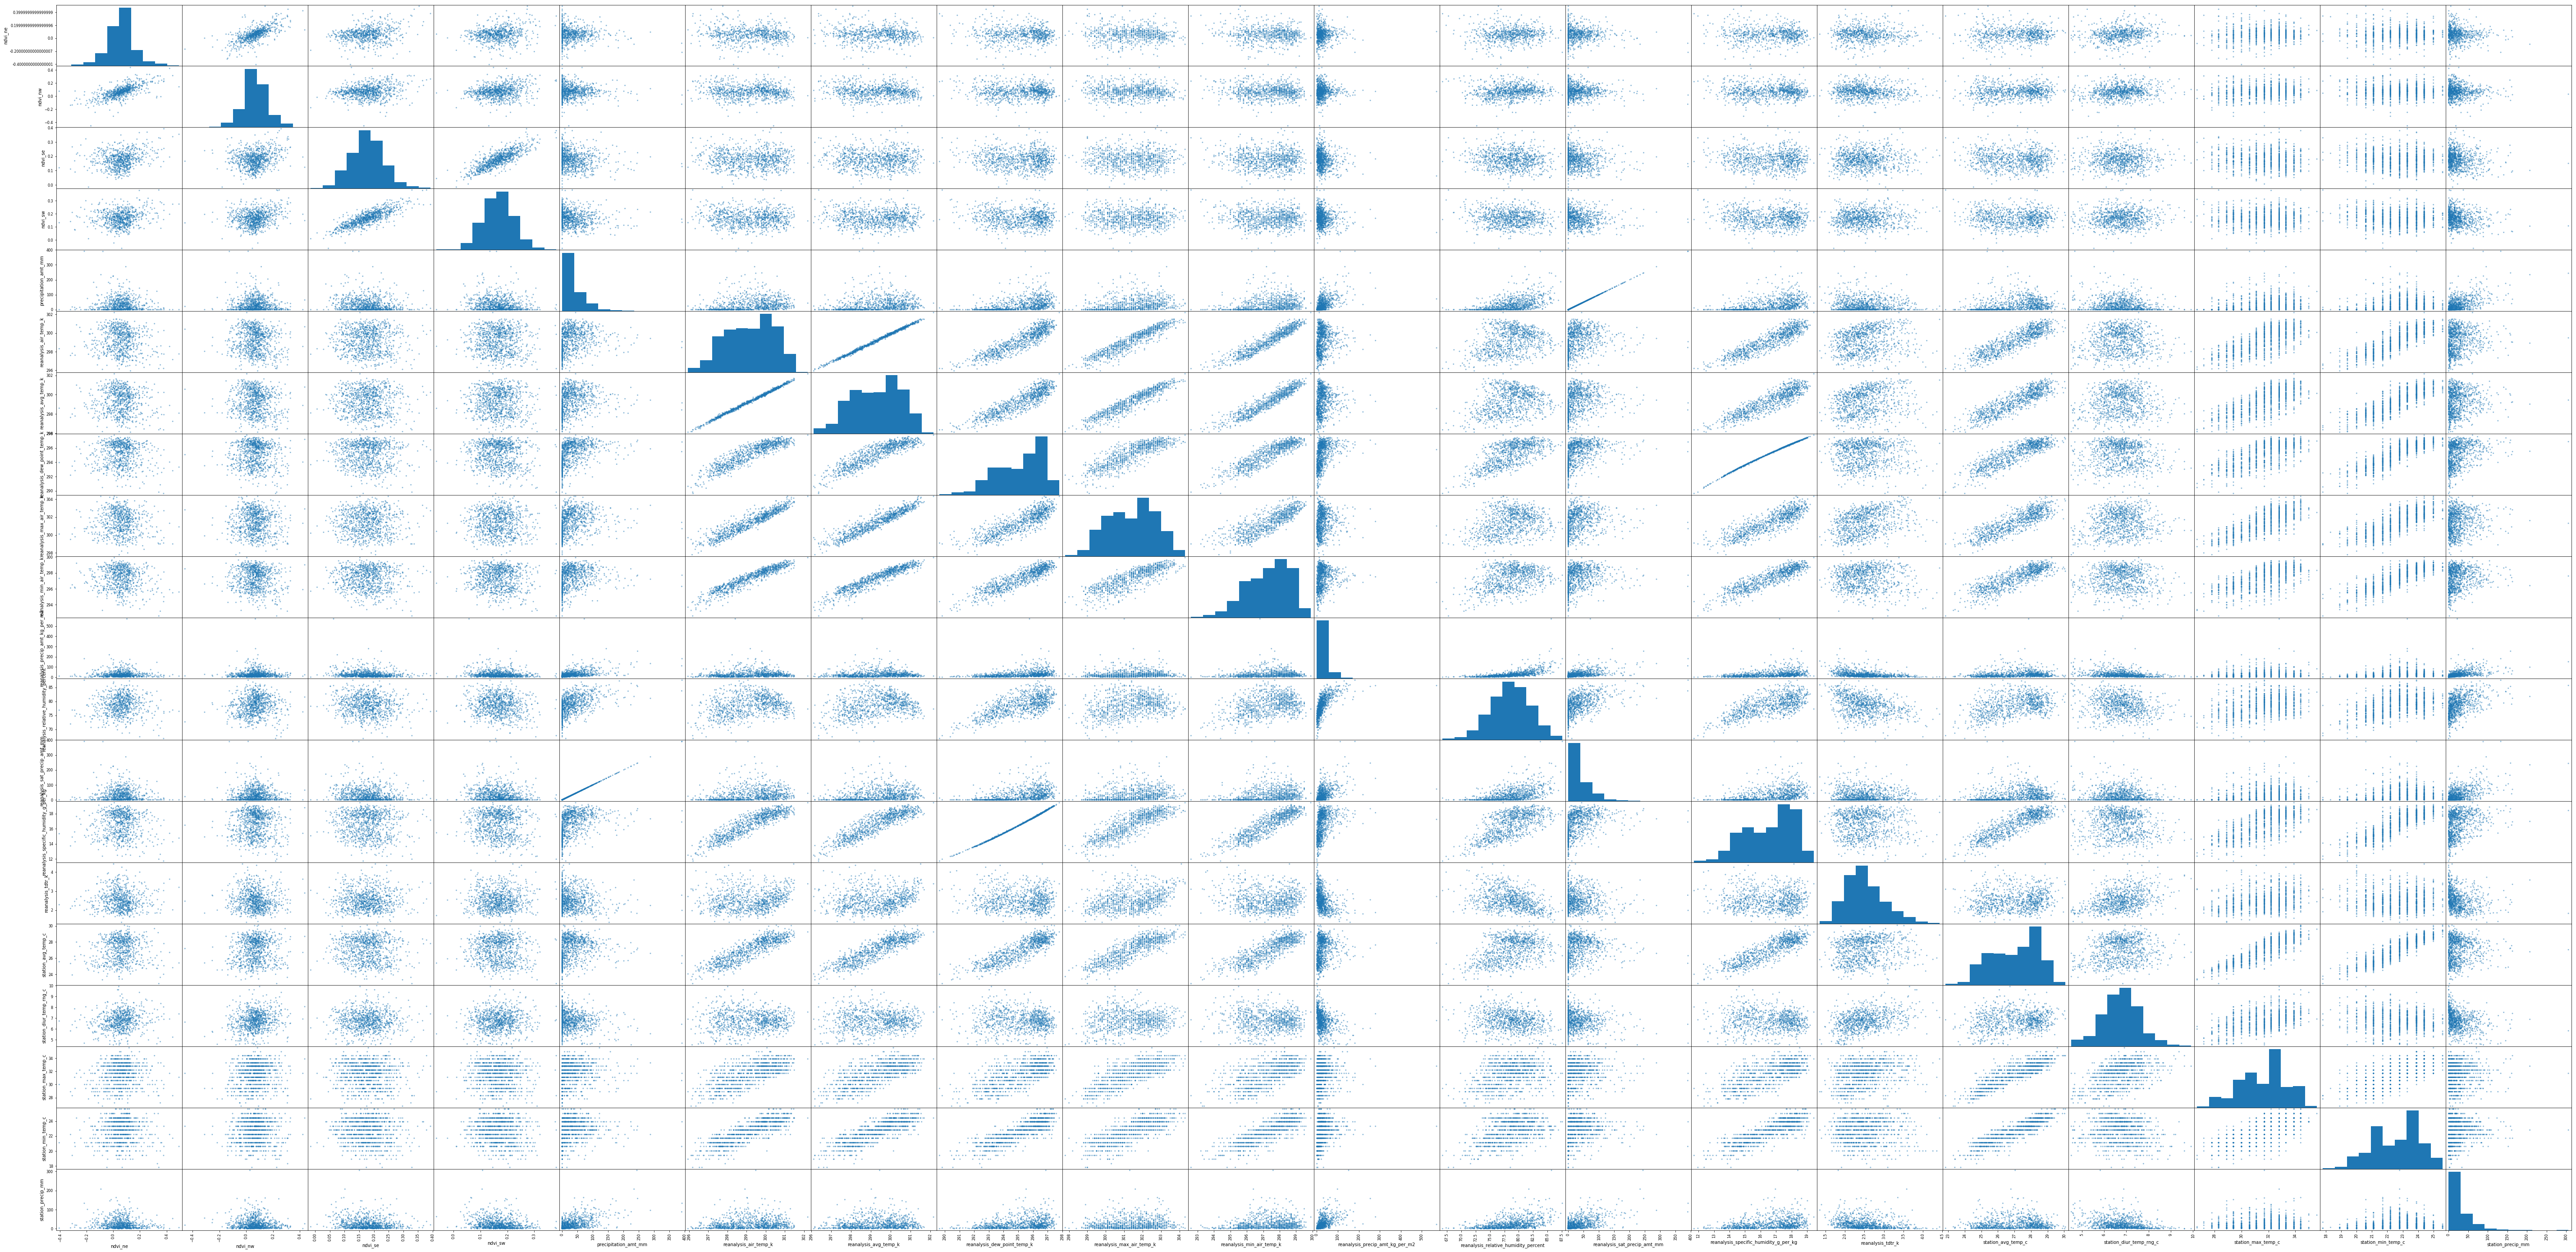

In [39]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix

plt.rcParams['figure.figsize'] = [100, 50]
scatter_matrix(dengue_features_train_sj_raw)
plt.show()

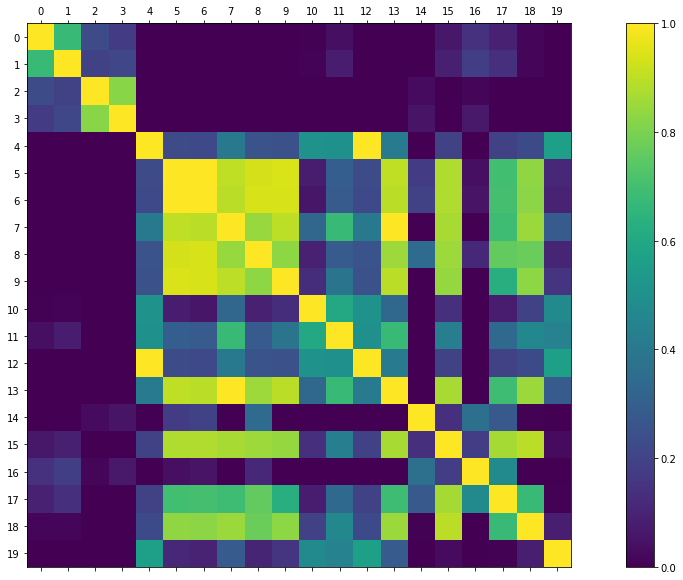

<Figure size 1440x720 with 0 Axes>

In [44]:
# plot correlation matrix
fig = plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]

correlations = dengue_features_train_sj_raw.corr()

plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,20,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(dengue_features_train_sj_raw.columns.values)
#ax.set_yticklabels(dengue_features_train_sj_raw.columns.values)
plt.show()

** Comments **
When checking the above plots, it is clear that a few features shows signs of correlation, which was already expected since some of them are actually measures the same phenomena from different readers, e.g. precipitation.

This correlation allows to work on data dimensionality reduction.

### Preprocess San Juan Data

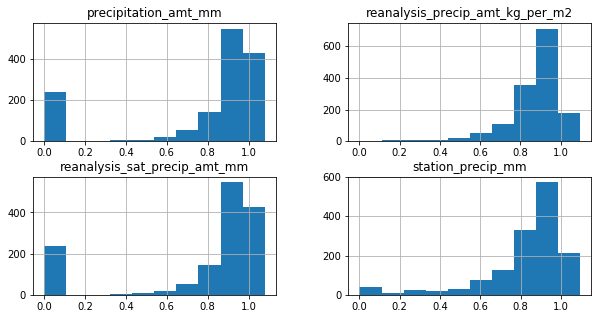

In [36]:
# Some of the charts are highly right skewed, namely the ones that corresponds to the following features:
positive_skewed_columns = ['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2','reanalysis_sat_precip_amt_mm','station_precip_mm']

# Log-transform the skewed features
features_log_transformed = pd.DataFrame(data = dengue_features_train_raw)
features_log_transformed[positive_skewed_columns] = features_log_transformed[positive_skewed_columns].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
plt.rcParams['figure.figsize'] = [10, 5]
features_log_transformed[positive_skewed_columns].hist()
plt.show()